> **Group:** Sara Martinez Rendon (1000424179) | Heider Zapata (1000009586) | Yeison Londoño (1000009479)  
> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Applied Mathematics  
> **Date:** 17/02/2026
---

# Examen 1 - Matemáticas Aplicadas en Ciencia de Datos

---

# Ejercicio 1

### (a) Plantee una ecuación matemática que relacione el determinante de A con el factor de volumen dado.

$$\text{Dado que } \quad |\det(A)| = 15\text{ (fact de vol dado) }, \quad \det(A) > 0 \implies \det(A) = 15 $$



### (b) Resuelva dicha ecuación (puede hacerlo a mano o usando la herramienta de cálculo simbólicode su lenguaje de programación) para encontrar el(los) valor(es) posible(s) de α

$$\text{Dada la matriz A: }\begin{bmatrix}1 & 2 & 1 \\
                                          α & 4 & 1 \\
                                          2 & 1 & 3
                           \end{bmatrix}\text{ = 15}:$$


$$ \det(\mathbf{A}) = 1 \cdot \begin{vmatrix} 4 & 1 \\ 1 & 3 \end{vmatrix} - (2) \cdot \begin{vmatrix} α & 1 \\ 2 & 3 \end{vmatrix} + 1 \cdot \begin{vmatrix} α & 4 \\ 2 & 1 \end{vmatrix} \text{ = 15}  $$

Usando el método de expansión por cofactores

$$ 1(12 - 1) - 2(3α - 2) + 1(α - 8) = 15  $$

$$11 - 6α + 4 + α - 8 =15 $$
$$7 - 5α = 15       $$
$$-5α = 15 - 7  $$
$$α = -\frac{8}{5}  $$





### (c) Justifique: ¿Por qué es necesario que el determinante sea diferente de cero para que esta misión de recuperación tenga éxito? ¿Qué pasaría geométricamente con el mensaje si det(A) = 0

Respuesta:
Es necesario que el determinande de la matriz A sea diferente de cero para que dicha matriz pueda ser invertible. 
$$ \mathbf{A}^{-1} \text{ existe} \iff \det(\mathbf{A}) \neq 0 $$
Para solucionar nuestro desafío y recuperar el mensaje original (x), necesitamos aplicar la transformación inversa a nuestra matriz A

$$ x=\mathbf{A}^{-1}y$$

Si el det(A) es 0, geometricamente ocurriría un "colpso" espacial que haría imposible la recuperación del mensaje original. Esto ocurre porque el determinante representa el factor de escala de volumen que la matriz transforma. Si det(A) = 0 el volumen se reducea cero. Esto significa que todo el espacio (tridimensional en este caso) se "aplasta" y se convierte en un plano, una lénea o un solo punto.





### implementación computacional

(a) Defina la matriz A usando el valor de α encontrado en la Fase 1

Matriz (A): con parámetro α: <br>$$ A =\begin{bmatrix}
1 & 2 & 1 \\
-\frac{8}{5} & 4 & 1 \\
2 & 1 & 3
\end{bmatrix}$$



(b) Calcule el determinante de dicha matriz usando el computador para verificar que coincide con
la pista de los metadatos.

In [6]:
# importación de las librerías necesarias
import numpy as np
import math

# valor de alpha encontrado
alpha = -8/5

# pista de los metadatos (“factor de escala delvolumen”) dado en el enunciado del problema
detA = 15

# Se construye la matriz A con el valor de alpha enocontrado
A = np.array([
             [1,2,1],
             [alpha,4,1],
             [2,1,3]
             ])

# Verificamos el determinante
# Pista: Los metadatos decían que era 15
det_A = np.linalg.det(A)
print(f"Determinante calculado por NumPy: {det_A:.2f}")
if(det_A==detA):
    print("*****coincide con pista de metadatos*****")
else:
    print("xxxxxx No coincide con pista de metadatos xxxxxxx")

Determinante calculado por NumPy: 15.00
*****coincide con pista de metadatos*****


(c) Calcule la matriz inversa $$\mathbf{A}^{-1}$$

In [8]:
# Calculamos la matriz inversa de la matriz A

A_inversa = np.linalg.inv(A)
print("\n--- Matriz Inversa (A^-1) ---")
print(A_inversa)


--- Matriz Inversa (A^-1) ---
[[ 0.73333333 -0.33333333 -0.13333333]
 [ 0.45333333  0.06666667 -0.17333333]
 [-0.64        0.2         0.48      ]]


(d) Realice la operación de descifrado x = A−1y para cada uno de los 6 vectores interceptados.

In [32]:
# estos son los 6 vectores cifrados recibidos (correspondientes a un mensaje de 18 caracteres)
y1 = np.array([[56, 67, 103]]).T
y2 = np.array([[54, 11, 117]]).T
y3 = np.array([[77, 55, 136]]).T
y4 = np.array([[70, 95, 110]]).T
y5 = np.array([[87, 77, 136]]).T
y6 = np.array([[96, 111, 138]]).T

lista_x = []

#listamos los valores interceptados y
vectores_y = [y1, y2, y3, y4, y5, y6]

for i, y in enumerate(vectores_y, start=1):
    # multiplicación de la inversa con los elementos y. El operador '@' en Python se usa para multiplicación de matrices/vectores
    x = A_inversa @ y
    #redondeo el valor al entero más cercano para evitar confusiones con los decimales
    x = np.round(x).astype(int)
    print(f"\n--- Vector Decodificado (x{i}) ---Guardado en lista x") 
    lista_x.append(x)  
    #print(f"Resultado bruto: {x}")
    #print(f"Resultado redondeado (para traducción): {np.round(x).astype(int)}")


--- Vector Decodificado (x1) ---Guardado en lista x

--- Vector Decodificado (x2) ---Guardado en lista x

--- Vector Decodificado (x3) ---Guardado en lista x

--- Vector Decodificado (x4) ---Guardado en lista x

--- Vector Decodificado (x5) ---Guardado en lista x

--- Vector Decodificado (x6) ---Guardado en lista x


(e) Muestre los vectores resultantes (x) y realice la conversión numérica a texto usando la tabla
suministrada para revelar el mensaje oculto.

In [45]:
print("lista de vectores x:")
for i, x_vec in enumerate(lista_x, start=1):
    # .flatten() convierte el vector columna [[n1], [n2], [n3]] en [n1, n2, n3]
    # para que la impresión sea más legible.
    valores = x_vec.flatten()
    print(f"x{i}: {valores}")
    

lista de vectores x:
x1: [ 5 12 27]
x2: [20  5 24]
x3: [20 15 27]
x4: [ 5 19 27]
x5: [20 21 25]
x6: [15 27 27]


In [49]:
#Proceso de Descifrado

# Creamos un diccionario llamado alfabeto, donde la llave es el número y el valor es la letra
alfabeto = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: ' '
}

#Varible para almacenar el mensaje final descifrado
mensaje_final = ""

print(f"{'Vector Y':<20} | {'Vector X (Números)':<20} | {'Letras'}")
print("-" * 60)

for y_num in vectores_y:
    y_vec = y_num
    
    # Operación matemática central: x = A^-1 * y
    x_vec = A_inversa @ y_vec
    
    # Usamos .flatten() para pasar de [[1], [2], [3]] a [1, 2, 3]
    x_enteros = np.round(x_vec).astype(int).flatten() 
    
    # Ahora 'num' será un entero puro y funcionará con el diccionario
    letras = "".join([alfabeto.get(num, '?') for num in x_enteros])
    mensaje_final += letras
    
    # Usamos tolist() en el print para que se vea más limpio
    print(f"{str(y_num.flatten().tolist()):<20} | {str(x_enteros.tolist()):<20} | {letras}")

print("-" * 60)
print(f"MENSAJE OCULTO: {mensaje_final}")

Vector Y             | Vector X (Números)   | Letras
------------------------------------------------------------
[56, 67, 103]        | [5, 12, 27]          | EL 
[54, 11, 117]        | [20, 5, 24]          | TEX
[77, 55, 136]        | [20, 15, 27]         | TO 
[70, 95, 110]        | [5, 19, 27]          | ES 
[87, 77, 136]        | [20, 21, 25]         | TUY
[96, 111, 138]       | [15, 27, 27]         | O  
------------------------------------------------------------
MENSAJE OCULTO: EL TEXTO ES TUYO  


MENSAJE OCULTO: EL TEXTO ES TUYO 

---

# Ejercicio 2

El ejercicio en una cadena de Markov, porque describe una secuencia de eventos _(estados)_ donde la probabilidad del futuro depende exclusivamente del estado actual.

La cadena de Markov puede ser visto como un grafo dirigido y ponderado:
**Nodos:** Estados del 1 al 7
**Aristas:** Transiciones posibles entre los estados (anterior-mismo-siguiente)
**Ponderación:** Probabilidades ($0 \le P_{ij} \le 1$)

La matriz de transición (P) es una matriz estocástica:

| Estado Actual | Estado Anterior | Mismo Estado | Estado Siguiente |
| :---: | :---: | :---: | :---: |
| 1 | 0 | 0.95 | 0.05 |
| 2 | 0.40 | 0.30 | 0.30 |
| 3 | 0.45 | 0.10 | 0.45 |
| 4 | 0.40 | 0.20 | 0.40 |
| 5 | 0.45 | 0.10 | 0.45 |
| 6 | 0.30 | 0.30 | 0.40 |
| 7 | 0.05 | 0.95 | 0 |


In [1]:
#Librerías necesarias:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

np.random.seed(20)  # Para que la aleatoriedad sea reproducible, y los resultados no cambien para los análisis posteriores.

In [2]:
#Matriz de transición

P = np.array([
    # E1    E2    E3    E4    E5    E6    E7   ← Estado destino
    [0.95, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00],  # Desde Estado 1
    [0.40, 0.30, 0.30, 0.00, 0.00, 0.00, 0.00],  # Desde Estado 2
    [0.00, 0.45, 0.10, 0.45, 0.00, 0.00, 0.00],  # Desde Estado 3
    [0.00, 0.00, 0.40, 0.20, 0.40, 0.00, 0.00],  # Desde Estado 4 (Estado inicial)
    [0.00, 0.00, 0.00, 0.45, 0.10, 0.45, 0.00],  # Desde Estado 5
    [0.00, 0.00, 0.00, 0.00, 0.30, 0.30, 0.40],  # Desde Estado 6
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.95],  # Desde Estado 7
])

#Como es Markov cada fila debe sumar 1, lo verificamos:
print("PASO 1: VERIFICACIÓN DE LA MATRIZ DE TRANSICIÓN P")
print("\nSuma de cada fila (todas deben ser exactamente 1.0):")
for i, suma in enumerate(P.sum(axis=1)):
    print(f"  Fila del Estado {i+1}: {suma:.2f} ✓")

PASO 1: VERIFICACIÓN DE LA MATRIZ DE TRANSICIÓN P

Suma de cada fila (todas deben ser exactamente 1.0):
  Fila del Estado 1: 1.00 ✓
  Fila del Estado 2: 1.00 ✓
  Fila del Estado 3: 1.00 ✓
  Fila del Estado 4: 1.00 ✓
  Fila del Estado 5: 1.00 ✓
  Fila del Estado 6: 1.00 ✓
  Fila del Estado 7: 1.00 ✓


In [3]:
# Nombres de los estados (para etiquetas en gráficos)
nombres_estados = [
    "1: Muy\nInsatisfecho",
    "2: Insatisfecho",
    "3: Lig.\nInsatisfecho",
    "4: Neutral",
    "5: Lig.\nSatisfecho",
    "6: Satisfecho",
    "7: Muy\nSatisfecho"
]


## 2.1. Simulación de caminata aleatoria

Para la simulación se hace uso de una función para ejecutar la simulación, y la simulación la repetimos 10 veces haciendo uso del método Monte Carlo para luego observar tendencias estadísticas.

In [4]:
#Función de simulación de la cadena de Markov (camianta aleatoria)
def simular_caminata(estado_inicial, num_pasos, matriz_P): #(int (1-7), int, np.array)
   
    # Convertimos a índice Python (0-6)
    estado_actual = estado_inicial - 1

    # Guardamos el recorrido completo
    recorrido = [estado_actual + 1]  # el +1 devuelve a escala 1-7

    for _ in range(num_pasos):
        # Tomamos las probabilidades de transición desde el estado actual
        # Matemáticamente: esta es la fila P[estado_actual, :]
        probabilidades = matriz_P[estado_actual, :]

        # Elegimos el siguiente estado según esas probabilidades
        # np.random.choice(7) elige un número entre 0 y 6,
        # con las probabilidades dadas
        estado_actual = np.random.choice(7, p=probabilidades)

        # Guardamos en escala 1-7
        recorrido.append(estado_actual + 1)

    return recorrido

In [5]:
#Simulación de la caminata usando la función
estado_inicial = 4    # Neutral
num_pasos      = 100  # Pasos por simulación
num_simulaciones      = 10   # Número de repeticiones


print("TAREA 1: SIMULACIÓN DE 10 CAMINATAS (100 pasos c/u)")
print(f"Estado inicial: {estado_inicial} (Neutral)")

simulaciones   = []
estados_finales = []

for i in range(num_simulaciones):
    recorrido = simular_caminata(estado_inicial, num_pasos, P)
    simulaciones.append(recorrido)
    estados_finales.append(recorrido[-1])
    print(f"  Simulación {i+1:2d}: estado final = {recorrido[-1]}")

print(f"\nResumen de estados finales: {estados_finales}")
print(f"Promedio del estado final:  {np.mean(estados_finales):.2f}")
print(f"Estado final más frecuente: {max(set(estados_finales), key=estados_finales.count)}")

TAREA 1: SIMULACIÓN DE 10 CAMINATAS (100 pasos c/u)
Estado inicial: 4 (Neutral)
  Simulación  1: estado final = 7
  Simulación  2: estado final = 7
  Simulación  3: estado final = 4
  Simulación  4: estado final = 4
  Simulación  5: estado final = 2
  Simulación  6: estado final = 5
  Simulación  7: estado final = 1
  Simulación  8: estado final = 1
  Simulación  9: estado final = 1
  Simulación 10: estado final = 2

Resumen de estados finales: [7, 7, 4, 4, 2, 5, 1, 1, 1, 2]
Promedio del estado final:  3.40
Estado final más frecuente: 1


## 2.2. Tendencia del cliente

El objetivo es responde  ¿A donde tiende a terminar el cliente con un nivel de satisfacción neutral después de un tiempo?

Para tener una mejor estimación estadística se aumenta el número de simulaciones, usando la Ley de los Grandes Números, que dice que, entre más repitas un experimento aleatorio, más cerca están los resultados del valor esperado.

In [6]:
num_simulaciones_grande = 500

print("TAREA 2: TENDENCIA DE CAMBIO DE LOS ESTADOS (500 simulaciones)")
print("=" * 60)

estados_finales_grande = []

for _ in range(num_simulaciones_grande):
    recorrido = simular_caminata(estado_inicial, num_pasos, P)
    estados_finales_grande.append(recorrido[-1])

# Contamos cuántas veces terminó en cada estado (frecuencuia de cada estado)
conteos = np.bincount(estados_finales_grande, minlength=8)[1:]  # índice 1-7
frecuencias = conteos / num_simulaciones_grande * 100  # convertir a porcentaje

print("\nDistribución de estados finales tras 100 pasos:")
print(f"{'Estado':<10} {'Veces':<10} {'Frecuencia %':<15}")
print("-" * 35)
for i, (c, f) in enumerate(zip(conteos, frecuencias)):
    barra = "█" * int(f / 2)
    print(f"  {i+1:<7} {c:<10} {f:5.1f}%  {barra}")


TAREA 2: TENDENCIA DE CAMBIO DE LOS ESTADOS (500 simulaciones)

Distribución de estados finales tras 100 pasos:
Estado     Veces      Frecuencia %   
-----------------------------------
  1       199         39.8%  ███████████████████
  2       19           3.8%  █
  3       15           3.0%  █
  4       23           4.6%  ██
  5       17           3.4%  █
  6       24           4.8%  ██
  7       203         40.6%  ████████████████████


Después de 100 iteraciones, un cliente que empieza en estado 4 (neutral) tiende a terminar en:

* Estado 1(Muy insatisfecho): 39.8%
* Estado 7 (Muy satisfecho): 40.6%

El cliente tiene a polarizarse.

## 2.3. Visualización del recorrido

Visualización del recorrido de como cambia el novel de satisfacción, que ilustre como cambia el nivel de satisfacción en cada paso.

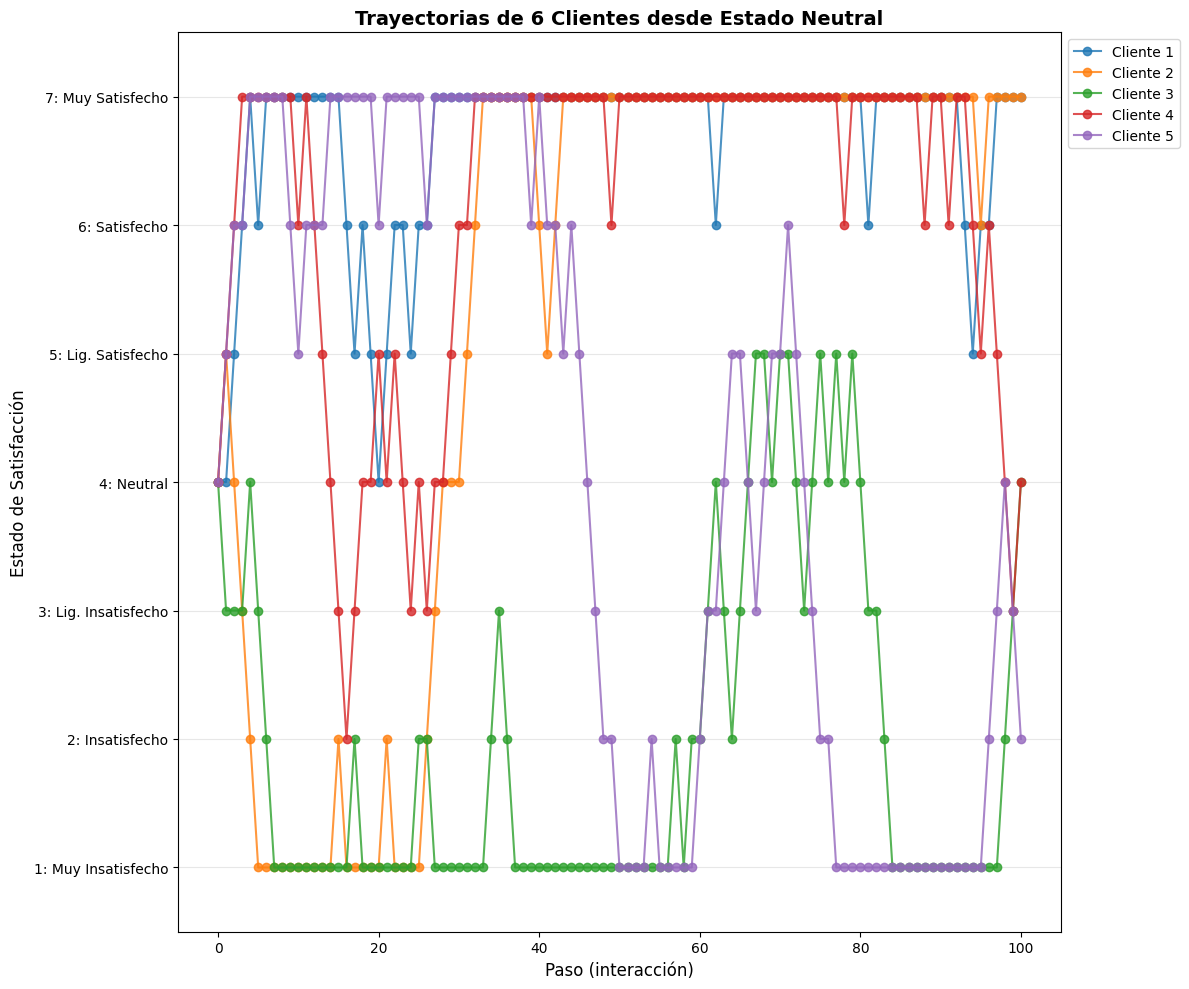

In [20]:
plt.figure(figsize=(12, 10)) # Un tamaño cómodo para ver las 6 líneas

for i, recorrido in enumerate(simulaciones[:5], start=1): #Mostrando las primers 5 simulaciones apra que no se vea sobre cargado el gráfico
    
    plt.plot(recorrido, marker='o', linestyle='-', alpha=0.8, label=f'Cliente {i}')

# Configuración de ejes y título
plt.xlabel('Paso (interacción)', fontsize=12)
plt.ylabel('Estado de Satisfacción', fontsize=12)
plt.title('Trayectorias de 6 Clientes desde Estado Neutral', 
          fontsize=14, fontweight='bold')

# Etiquetas del eje Y
plt.yticks(range(1, 8), [
    '1: Muy Insatisfecho',
    '2: Insatisfecho',
    '3: Lig. Insatisfecho',
    '4: Neutral',
    '5: Lig. Satisfecho',
    '6: Satisfecho',
    '7: Muy Satisfecho'
])

plt.ylim(0.5, 7.5)
plt.grid(True, axis='y', alpha=0.3) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()

Del gráfico observamos que el estado del que es más díficil salir partiendo de un estado 4 (neutral) es el estado 7 (muy satisfecho)

## 2.4. Explicación esquemática dinámica del proceso

Esta sección utiliza conceptos de álgebra lineal para explicar el proceso lógico seguido en la creación del código de los numerales anteriores.

<div align="center">
<img src="939accf6-7efa-4aa3-a590-5ee1757dfb73.jpg" width="500">
</div>

Como se mencionó inicialmente, una cadena de Márkov puede visualizarse como un grafo dirigido y ponderado. Sin embargo, posee reglas específicas: se rige por una matriz estocástica donde todas sus filas deben sumar 1 y se cumple la propiedad de Márkov (el estado siguiente solo depende del estado actual).


Conceptos básicos de algebra lineal aplicados:

1. *Vector de Estado ($v$):* Se utiliza para representar la probabilidad de ubicación en el sistema. Para este caso, iniciamos en el Estado 4 (Neutral):
$$v_0 = [0, 0, 0, 1, 0, 0, 0]$$

2. *Matriz de transiciones  ($P$):*  Matriz cuadrada donde cada fila representa el estado actual, cada columna representa el estado destino y cada celda $a_{ij}$ es la probabilidad de transición. Al utilizar vectores fila, la matriz $P$ se define como una matriz estocástica por la derecha (donde la suma de cada fila es igual a 1). Si se utilizaran vectores columna, la operación sería $v_{t+1} = P^T \cdot v_t$.

$$
\begin{bmatrix}
0.95 & 0.05 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
0.40 & 0.30 & 0.30 & 0.00 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.45 & 0.10 & 0.45 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.00 & 0.40 & 0.20 & 0.40 & 0.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.45 & 0.10 & 0.45 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 0.30 & 0.30 & 0.40 \\
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.05 & 0.95 \\
\end{bmatrix}
$$

En la simulación: en cada paso se consulta la fila correspondiente al estado actual para determinar probabilísticamente el siguiente estado.

3. *Multiplicación de matrices:* Permite proyectar el estado del cliente hacia el futuro. El estado inmediato se define como:

$$v_{próximo} = v_{actual} \cdot P$$

Si se desea predecir el comportamiento a más de un paso, se utiliza la potencia de la matriz de transición:

$$v_n = v_0 \cdot P^n$$

Siendo n el número de pasos

En la simulación: esto se implementa mediante repetición iterativa - aplicar las transiciones paso a paso, generando trayectorias aleatorias que, al promediar muchas repeticiones, convergen a esta distribución teórica. ambién, observamos que después de 100 pasos, los clientes ya muestran una fuerte tendencia a concentrarse en los estados 1 y 7 (aproximadamente 40% cada uno), acercándose a esta distribución estacionaria.

---

# **Ejercicio 3**

En el procesamiento de imágenes es fundamental identificar los bordes, ya que estos definen las formas y
estructuras presentes en una escena. En lugar de utilizar filtros tradicionales, exploraremos un enfoque
iterativo en el que cada píxel se actualiza en función de sus vecinos, hasta que la imagen alcanza un
estado estable. Este método, formulado como una ecuación de punto fijo, te permitirá comprender cómo
la iteración puede realzar los bordes de manera progresiva.

Implementarás un algoritmo iterativo basado en la siguiente regla de actualización:

>$$X^{(n+1)}_{i,j} = \alpha X^{(n)}_{i,j} + (1-\alpha) \left( \frac{X_{i+1,j} + X_{i-1,j} + X_{i,j+1} + X_{i,j-1}}{4} \right)$$

donde $X^{(n)}$ es la imagen en la iteración $n$ y $α$ es un parámetro que hay que ajustar.

---

##### **1. Interpretación del algoritmo:**

El enunciado anterior nos propone una regla de actualización para cada píxel $(i, j)$ en la iteración $n+1$, definida por:

$$X^{(n+1)}_{i,j} = \alpha X^{(n)}_{i,j} + (1-\alpha) \left( \frac{X_{i+1,j} + X_{i-1,j} + X_{i,j+1} + X_{i,j-1}}{4} \right)$$

Esta ecuación representa una combinación convexa entre el estado actual del píxel y su entorno local. Para comprender mejor sus implicaciones, veamos la función componente por componente. El algoritmo propuesto es una ecuación se puede representar como una de punto fijo de la forma:

$$X^{(n+1)} = \alpha X^{(n)} + (1-\alpha) \mathcal{L}(X^{(n)})$$

Donde $\mathcal{L}$ representa el promedio de los 4 vecinos más cercanos (arriba, abajo, izquierda, derecha).

**Interpretación:**
1.  Promediar los vecinos es aplicar un filtro de **suavizado** (desenfoque). Al iterar, estamos difundiendo la intensidad de los píxeles originales hacia sus vecinos.

2.  El parámetro $\alpha$ actúa como un factor de inercia o memoria:
    * Si $\alpha \approx 1$: La imagen cambia muy lentamente (conserva el valor del pixel actual).
    * Si $\alpha \approx 0$: La imagen se reemplaza casi totalmente por el promedio de sus vecinos en cada paso (difusión rápida).

3.  Convergencia: según lo visto en clase, esperamos que el sistema alcanza un estado estable cuando la imagen deja de cambiar entre iteraciones, es decir, $X^{(n+1)}_{i,j} = X^{(n)}_{i,j}$. Para comprender por qué el algoritmo converge  a una imagen donde se ha perdido la información (una imagen borrosa o plana), podemos analizar el comportamiento del sistema en su estado estacionario:

Definimos el estado estacionario como el punto donde la imagen ya no cambia entre iteraciones, es decir, cuando se cumple la condición de punto fijo:
$$X^{(n+1)}_{i,j} = X^{(n)}_{i,j}$$

Denotemos este valor límite simplemente como $X_{i,j}$. Sustituyendo esto en la ecuación de actualización original:

$$X_{i,j} = \alpha X_{i,j} + (1-\alpha) \left( \frac{X_{i+1,j} + X_{i-1,j} + X_{i,j+1} + X_{i,j-1}}{4} \right)$$

$$X_{i,j} - \alpha X_{i,j} = (1-\alpha) \cdot \text{Promedio}(Vecinos)$$

$$(1-\alpha) X_{i,j} = (1-\alpha) \cdot \text{Promedio}(Vecinos)$$

Asumiendo que $\alpha \neq 1$ (ya que si $\alpha=1$ no habría cambio alguno), podemos dividir ambos lados por $(1-\alpha)$:

$$X_{i,j} = \text{Promedio}(Vecinos)$$

$$X_{i,j} = \frac{X_{i+1,j} + X_{i-1,j} + X_{i,j+1} + X_{i,j-1}}{4}$$


La igualdad $X_{i,j} = \text{Promedio}(Vecinos)$ nos indica que la imagen resultante es una función armónica discreta. Esto nos indicaría dos cosas:
* **Ausencia de Extremos Locales:** Por definición, un píxel en equilibrio no puede ser ni más brillante ni más oscuro que el promedio de su entorno.
* **Difusión Total:** Físicamente, el algoritmo actúa disipando los contrastes. En el límite ($n \to \infty$), la imagen converge a una superficie plana y homogénea, perdiendo toda su **información de alta frecuencia** (detalles y bordes).

**4. La Lógica de Detección de Bordes**

La pérdida de información de punto anterior la podemos utilizar para encontrar los bordes. Podemos descomponer la imagen original conceptualmente en dos componentes:
$$\text{Imagen Original} = \text{Estructura Base (Bajas Frecuencias)} + \text{Detalles/Bordes (Altas Frecuencias)}$$

Dado que nuestro algoritmo iterativo genera una versión suavizada ($S$) que conserva *solo* la estructura base, podemos recuperar los detalles restando esta versión de la original ($I$):

$$\text{Bordes} = | I - S |$$

Así, la diferencia absoluta $|I - S|$ elimina las zonas planas (donde $I \approx S$) y resalta únicamente las zonas donde hubo cambios drásticos que el suavizado eliminó: **los bordes**.

---

Importamos la imagen original en escala de grisis:

Nota: las imagenes utilizadas para este ejercicio pueden ser descargadas desde:

https://drive.google.com/drive/folders/1dzfxk-8IOSFeeunAYZm4rvu1WYbdYZjB?usp=sharing

Imagen cargada. Dimensiones: (814, 1120)


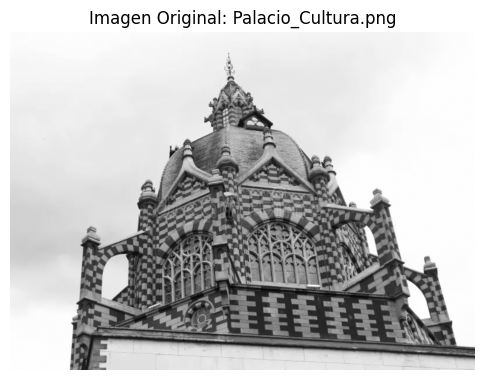

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. Configuración de Rutas para trabajo colaborativo en Git Hub / local---
current_folder = Path.cwd() 
data_path = current_folder / "data"
filename = 'Palacio_Cultura.png'

# Construimos la ruta completa
image_full_path = data_path / filename

# --- 2. Carga y Preprocesamiento ---
X_original = cv2.imread(str(image_full_path), cv2.IMREAD_GRAYSCALE) #garantizamos que se importe en escala de grises

# Como es recomendado, realizamos normalización entre 0 y 1 (Fundamental para la convergencia del algoritmo)
X_original = X_original.astype(np.float32) / 255.0 # -> Normalizamos el rango de intensidad de [0, 255] a [0.0, 1.0].
print(f"Imagen cargada. Dimensiones: {X_original.shape}")

# --- 3. Visualización ---
plt.figure(figsize=(6, 6))
plt.imshow(X_original, cmap='gray')
plt.title(f"Imagen Original: {filename}")
plt.axis('off')
plt.show()

#### **Estrategia de Implementación:**

>Para resolver la ecuación de difusión propuesta sin recurrir a bucles `for` sobre los píxeles (lo cual sería computacionalmente ineficiente en Python), utilizamos vectorización (operaciones de álgebra lineal sobre matrices completas).  
>1.  **Desplazamiento (Slicing):** En lugar de acceder a $X_{i-1,j}$, desplazamos toda la matriz una fila hacia abajo. Hacemos lo análogo para los 4 vecinos. Para esto, en vez de hacer un cálculo píxel por píxel (que es lento con loops), tomaremos toda la matriz y la desplazaremos un paso hacia abajo. Al hacer eso, todos los píxeles quedan alineados con su "vecino de arriba" automáticamente. Haremos lo mismo para los 4 lados y sumamos las matrices completas en un mismo movimiento con Numpy Slicing. En vez de multiplicar matrices, desplazamos el array completo: img[2:, :] (es mover todo arriba), img[:-2, :] (mover todo abajo), etc. De esta manera hacemos matemática vectorizada, pero sin crear una matriz gigante.
>
>2.  **Métrica de Error:** Para detener la iteración, utilizamos la **Norma de Frobenius** ($||A||_F$) de la diferencia entre dos iteraciones consecutivas, siguiendo lo visto en clase.
>3.  **Detección de Bordes:** Al finalizar, calculamos la diferencia absoluta entre la imagen original (nítida) y la suavizada (difusa).
>
>$\text{Bordes} = | X_{original} - X_{suavizada} |$
>
---

***Justificación de Hiperparámetros que seleccionaremos para el Algoritmo***:

Para la implementación del método iterativo, se han seleccionado los siguientes valores por defecto basándonos en criterios de estabilidad numérica y eficiencia computacional:

**1. Parámetro de Inercia ($\alpha = 0.5$):**
* **Función:** Controla la velocidad de difusión. Representa un compromiso equitativo entre la "memoria" del estado anterior ($50\%$) y la influencia del entorno ($50\%$).

**2. Tolerancia de Convergencia (`tol` $= 1 \times 10^{-4}$):**
* **Función:** Define el umbral bajo el cual consideramos que el sistema ha alcanzado el estado estacionario ($||X^{(n+1)} - X^{(n)}||_F < \text{tol}$).
* **Justificación:** Dado que las imágenes están normalizadas en el rango $[0, 1]$, una variación total (Norma de Frobenius) inferior a $10^{-4}$ implica que los cambios a nivel de píxel son despreciables para la percepción humana y el análisis numérico. Buscar una tolerancia menor (ej. $10^{-9}$) aumentaría el costo computacional sin aportar mejoras visuales significativas ("diminishing returns").

**3. Límite de Iteraciones (`max_iter` $= 10000$):**  
* **Función:** Cota superior de ejecución.  
* **Justificación:** Actúa como mecanismo de seguridad (*failsafe*) para prevenir bucles infinitos en caso de inestabilidad numérica
---

#### **Implementación**

In [ ]:
# ==========================================
# 2 y 3. IMPLEMENTACIÓN DEL ALGORITMO DE DIFUSIÓN
# ==========================================

def smoothing_process(img_in, alpha=0.5, tol=1e-5, max_iter=10000):
    """
    Aplica un filtro de suavizado iterativo basado en la media de vecinos.
    
    Parámetros:
    -----------
    img_in   : np.array. Imagen original (Matriz 2D).
    alpha    : float. Factor de inercia (0 < alpha < 1). 
               alpha alto -> Mayor conservación de la imagen original (lento).
               alpha bajo -> Mayor influencia de los vecinos (rápido).
    tol      : float. Criterio de parada basado en la Norma de Frobenius del error.
    max_iter : int. Límite de seguridad para evitar bucles infinitos.
    
    Retorna:
    --------
    X_curr : Imagen suavizada final.
    errors : Lista histórica de errores (para análisis de convergencia).
    """
    
    # Copia para no alterar la imagen original en memoria
    X_curr = img_in.copy()
    errors = []

    # -----------------------------------------------------------------------------
    # CONDICIONES DE FRONTERA (PADDING) -> Manejo de pixeles de los bordes extremos
    # -----------------------------------------------------------------------------
    # Usamos np.pad para crear un marco de 1 píxel alrededor de la imagen .
    # mode='edge' replica el valor del borde. Esto simula una condición de
    # frontera de Neumann (aislante), minimizando distorsiones en los límites (para evitar index out of range luego)
    X_padded = np.pad(X_curr, 1, mode='edge')

    print(f"Iniciando proceso iterativo (Alpha={alpha}, Tol={tol})...")

    for n in range(max_iter):
        X_prev = X_curr.copy()

        # -----------------------------------------------------
        # VECTORIZACIÓN DE VECINOS (Slicing en lugar de Bucles)
        # -----------------------------------------------------
        # La matriz X_padded tiene dimensiones (H+2, W+2).
        # El centro (imagen actual) está en X_padded[1:-1, 1:-1].
        
        # Desplazamientos relativos para alinear vecinos con el centro:
        up    = X_padded[0:-2, 1:-1] # Fila i-1 (Desplazar matriz ABAJO visualmente)
        down  = X_padded[2:,   1:-1] # Fila i+1 (Desplazar matriz ARRIBA visualmente)
        left  = X_padded[1:-1, 0:-2] # Columna j-1 (Desplazar matriz DERECHA)
        right = X_padded[1:-1, 2:  ] # Columna j+1 (Desplazar matriz IZQUIERDA)

        # Cálculo vectorizado de la suma de vecinos
        neighbors_sum = up + down + left + right

        # -----------------------------------------------------
        # REGLA DE ACTUALIZACIÓN (Ecuación del Ejercicio)
        # -----------------------------------------------------
        # X^(n+1) = alpha * X^(n) + (1 - alpha) * Promedio(Vecinos)
        X_new = alpha * X_prev + ((1 - alpha) / 4.0) * neighbors_sum

        # -----------------------------------------------------
        # CÁLCULO DEL ERROR (CONVERGENCIA)
        # -----------------------------------------------------
        # Usamos la Norma de Frobenius (Raíz de suma de cuadrados) de la matriz diferencia.
        # Representa la "distancia" total entre la imagen anterior y la nueva.
        diff = X_new - X_prev
        error = np.linalg.norm(diff, 'fro')
        errors.append(error)

        # Actualización de estados para la siguiente iteración
        X_curr = X_new
        
        # IMPORTANTE: Actualizar el centro del padding con la nueva imagen
        # para que los vecinos de la próxima iteración sean los correctos.
        X_padded[1:-1, 1:-1] = X_curr

        # Criterio de parada
        if error < tol:
            print(f"-> Convergencia alcanzada en la iteración {n} (Error: {error:.2e})")
            break
    else:
        print(f"-> Se alcanzó el límite de iteraciones ({max_iter}) sin convergencia total.")

    return X_curr, errors

Iniciando proceso iterativo (Alpha=0.5, Tol=0.001)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


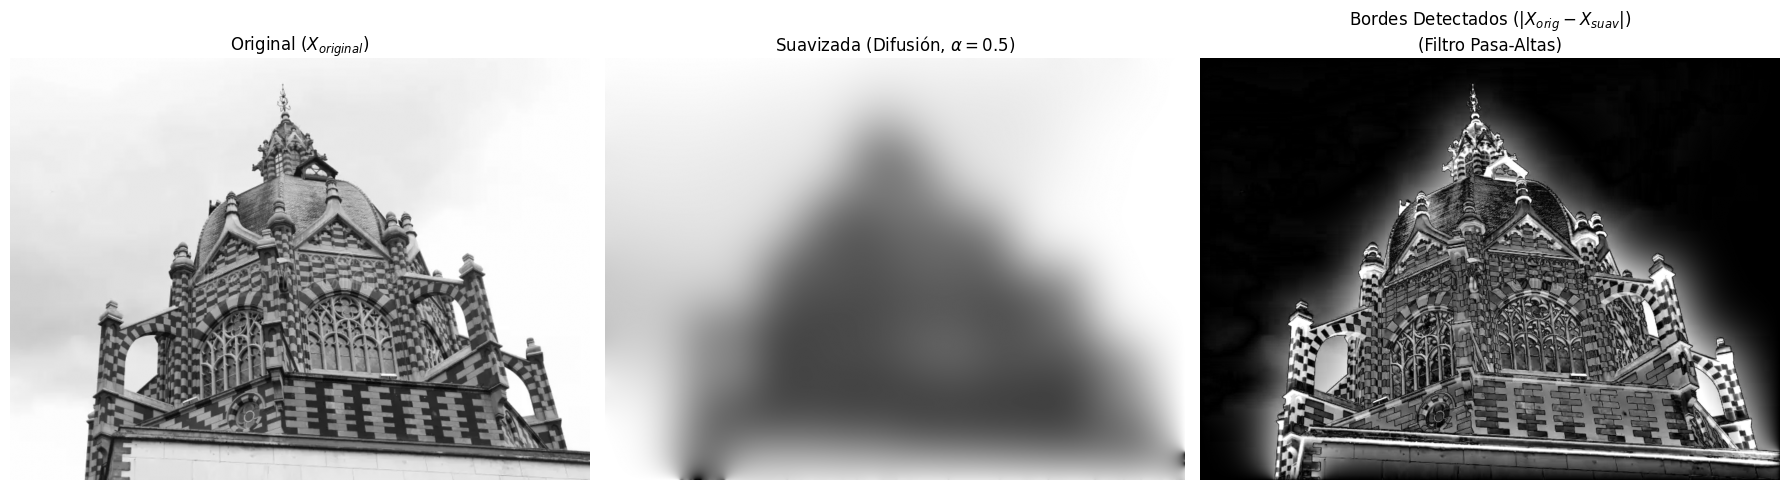

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
ALPHA_VAL = 0.5
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

##### **Experimenta con distintos valores de $α$**

**Bajemos el Alpha a 0.1**:

Iniciando proceso iterativo (Alpha=0.1, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


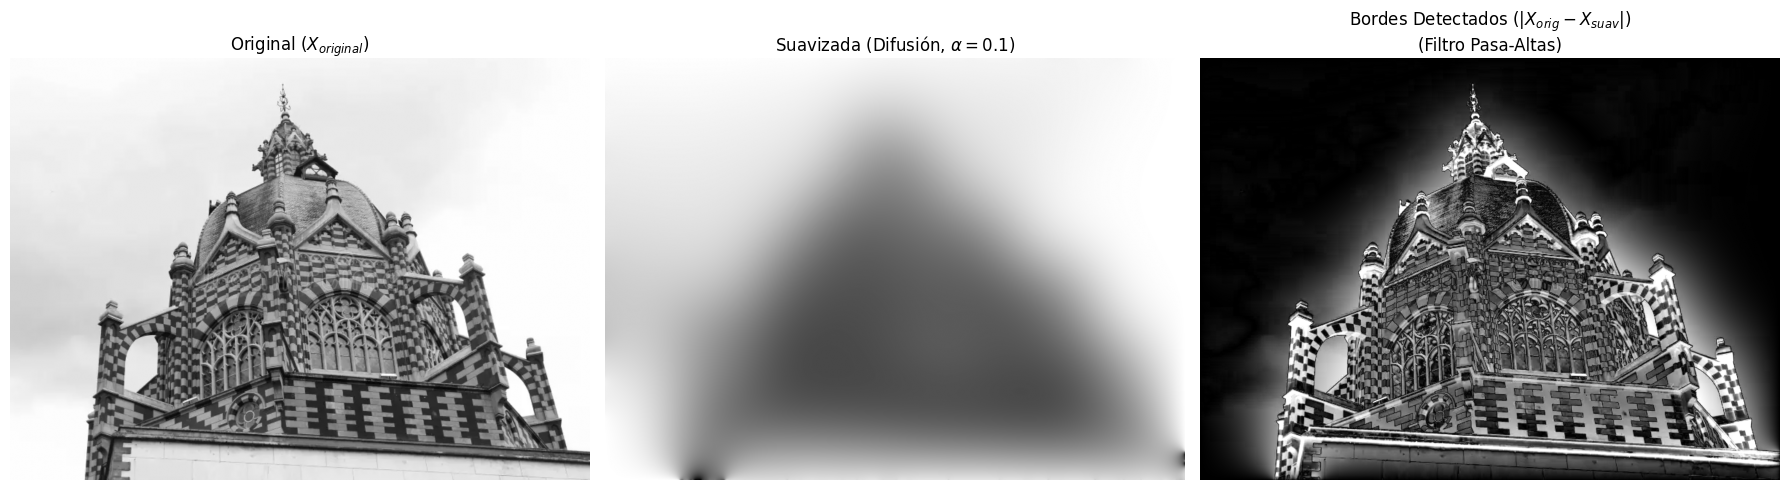

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
# alpha = 0.1: Baja inercia para favorecer una difusión rápida y resaltar bordes.
ALPHA_VAL = 0.1
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

**subimos el Alpha a 0.9**:

Iniciando proceso iterativo (Alpha=0.9, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


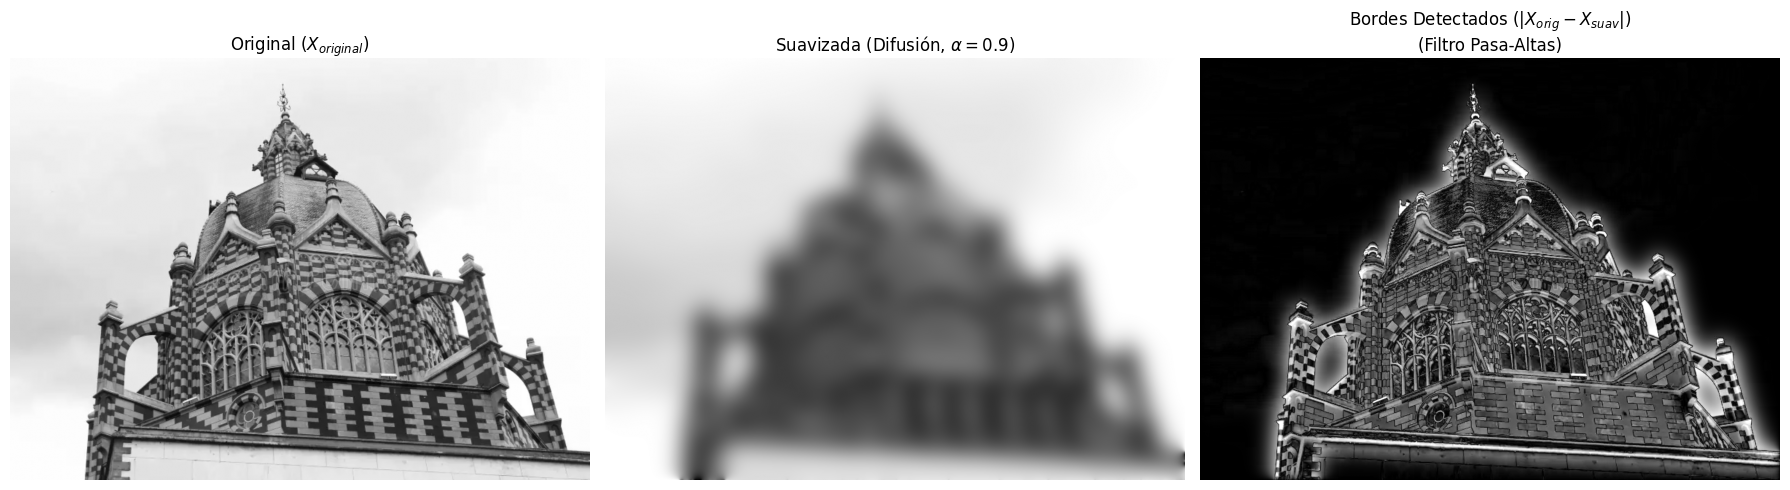

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
# alpha = 0.9: Alta inercia para favorecer una difusión rápida y resaltar bordes.
ALPHA_VAL = 0.9
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

#### **Análisis de convergencia (1):**

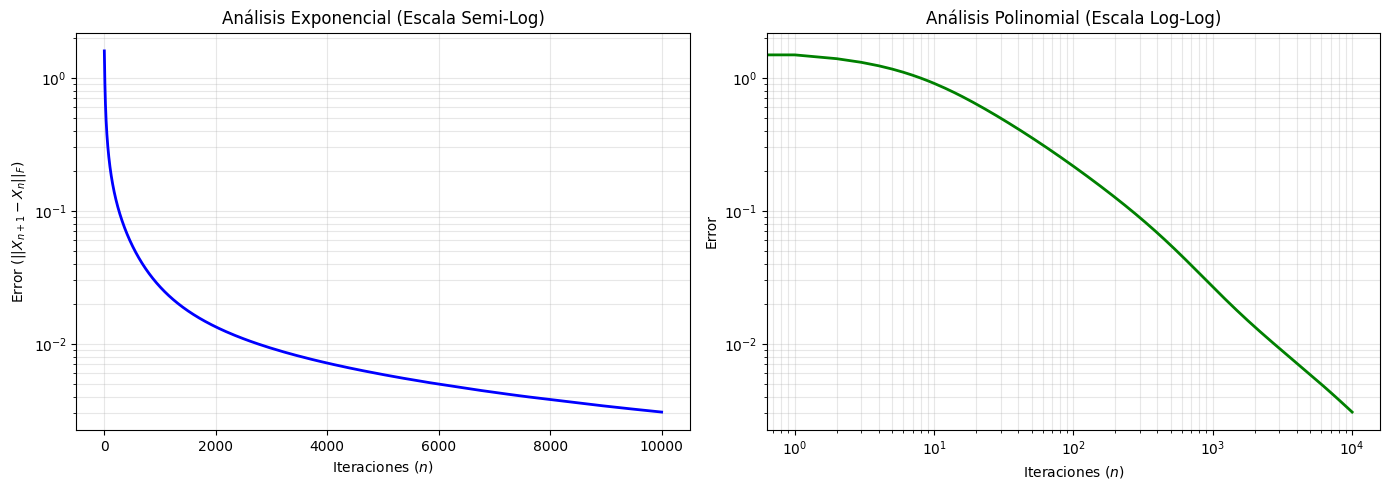

In [ ]:
# ==========================================
# 6. ANÁLISIS DE TASA DE CONVERGENCIA
# ==========================================
# Objetivo: Determinar si el error decae exponencialmente O(e^-n) o polinomialmente O(1/n^c).

plt.figure(figsize=(14, 5))

# --- GRÁFICO 1: Escala Semi-Logarítmica ---
# Si la gráfica es una línea recta, la convergencia es EXPONENCIAL.
# log(Error) ~ -n
plt.subplot(1, 2, 1)
plt.plot(error_history, linewidth=2, color='blue')
plt.yscale('log') # Eje Y logarítmico
plt.title("Análisis Exponencial (Escala Semi-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error ($||X_{n+1} - X_{n}||_F$)")
plt.grid(True, which="both", ls="-", alpha=0.3)

# --- GRÁFICO 2: Escala Log-Log ---
# Si la gráfica fuera recta aquí, la convergencia sería POLINOMIAL.
# log(Error) ~ -log(n)
plt.subplot(1, 2, 2)
plt.loglog(error_history, linewidth=2, color='green') # Ambos ejes logarítmicos
plt.title("Análisis Polinomial (Escala Log-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error")
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

En la primera fase experimental, se aplicó el algoritmo sobre la imagen original de alta resolución ($814 \times 1120$ píxeles). Los resultados de convergencia bajo distintos valores de $\alpha$ no lograron converger totalmente tras las prineras 10.000 iteraciones.

Al tener casi un millón de puntos (píxeles), la "comunicación" de información entre los bordes y el centro de la imagen requiere una cantidad de pasos proporcional a la dimensión de la matriz. En este caso, 10,000 iteraciones resultan insuficientes para que el sistema alcance el estado estacionario

Decaimiento Polinomial: Se observa que el error sigue una tasa de caída $\mathcal{O}(1/n^c)$, lo cual es extremadamente lento en resoluciones altas.

Para validar si este comportamiento es inherente a la resolución o al contenido de la imagen, procederemos a ensayar con una segunda imagen. No obstante, bajo la misma densidad de píxeles, se anticipa un comportamiento similar de no-convergencia, lo que nos llevará a considerar el redimensionamiento (downsampling) como estrategia de optimización.

---

#### **Experimenta con otra imágen**

Cambiemos de imagen

Imagen cargada. Dimensiones: (744, 963)


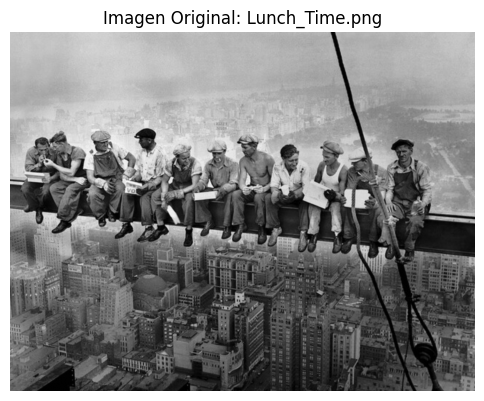

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. Configuración de Rutas para trabajo colaborativo en Git Hub / local---
current_folder = Path.cwd() 
data_path = current_folder / "data"
filename = 'Lunch_Time.png'

# Construimos la ruta completa
image_full_path = data_path / filename

# --- 2. Carga y Preprocesamiento ---
X_original_2 = cv2.imread(str(image_full_path), cv2.IMREAD_GRAYSCALE) #garantizamos que se importe en escala de grises

# Como es recomendado, realizamos normalización entre 0 y 1 (Fundamental para la convergencia del algoritmo)
X_original_2 = X_original_2.astype(np.float32) / 255.0 # -> Normalizamos el rango de intensidad de [0, 255] a [0.0, 1.0].
print(f"Imagen cargada. Dimensiones: {X_original_2.shape}")

# --- 3. Visualización ---
plt.figure(figsize=(6, 6))
plt.imshow(X_original_2, cmap='gray')
plt.title(f"Imagen Original: {filename}")
plt.axis('off')
plt.show()

Iniciando proceso iterativo (Alpha=0.5, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


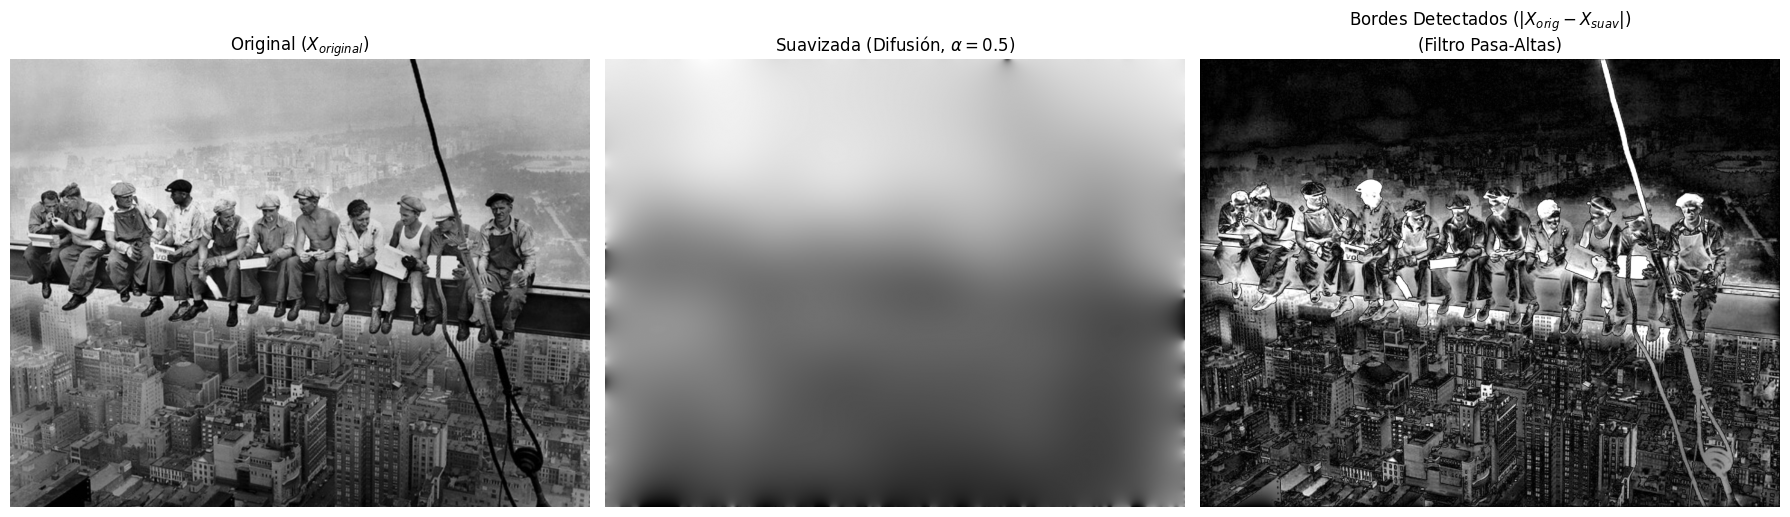

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
ALPHA_VAL = 0.5
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed_2, error_history = smoothing_process(X_original_2, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed_2) contiene las bajas frecuencias.
# La imagen original (X_original_2) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original_2 - X_smoothed_2)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original_2, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed_2, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

##### **Experimenta con distintos valores de $α$**

**Bajemos el Alpha a 0.1**:

Iniciando proceso iterativo (Alpha=0.1, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


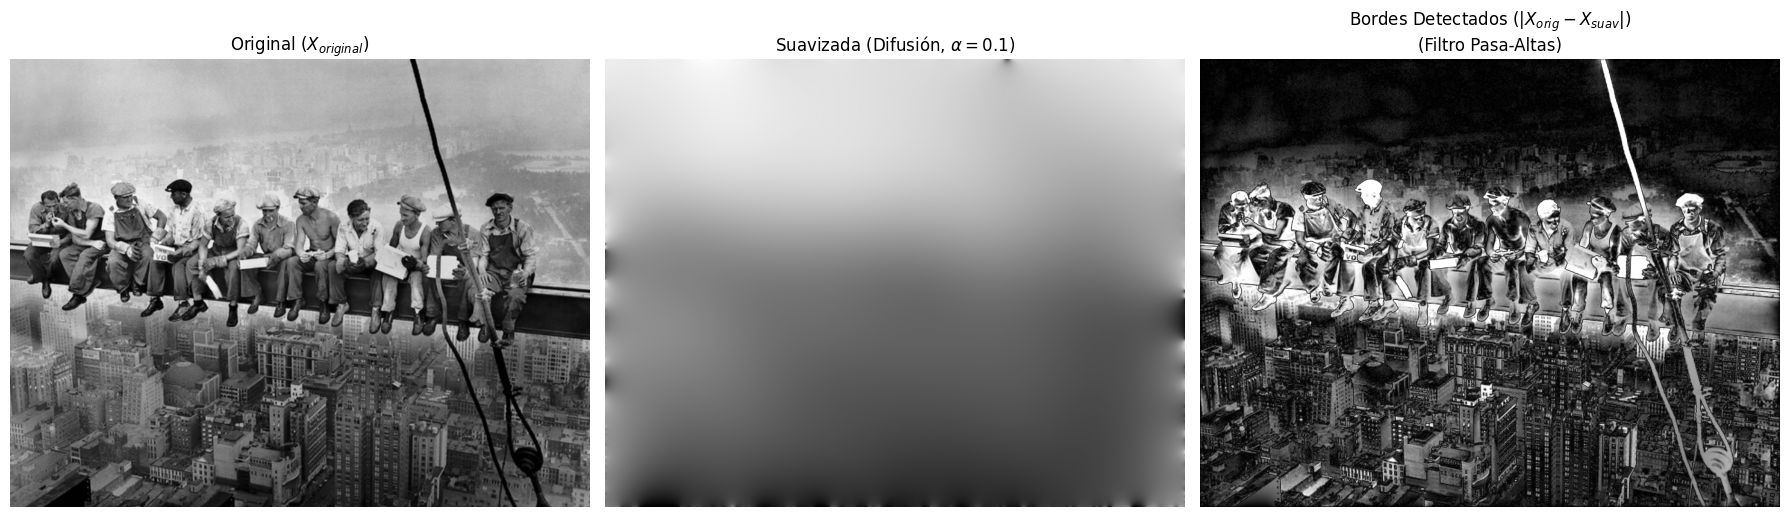

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
ALPHA_VAL = 0.1
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed_2, error_history = smoothing_process(X_original_2, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed_2) contiene las bajas frecuencias.
# La imagen original (X_original_2) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original_2 - X_smoothed_2)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original_2, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed_2, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

**subimos el Alpha a 0.9**:

Iniciando proceso iterativo (Alpha=0.9, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


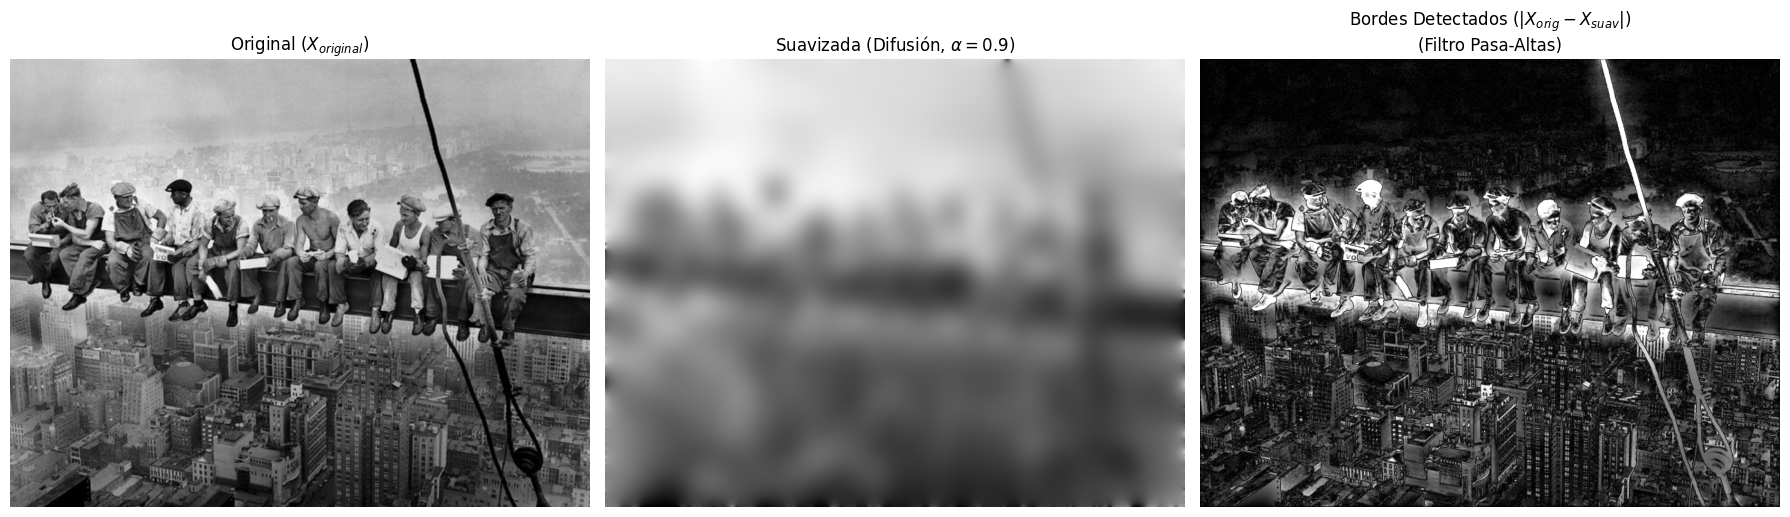

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
ALPHA_VAL = 0.9
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed_2, error_history = smoothing_process(X_original_2, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed_2) contiene las bajas frecuencias.
# La imagen original (X_original_2) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original_2 - X_smoothed_2)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original_2, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed_2, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

#### **Análisis de convergencia (2):**

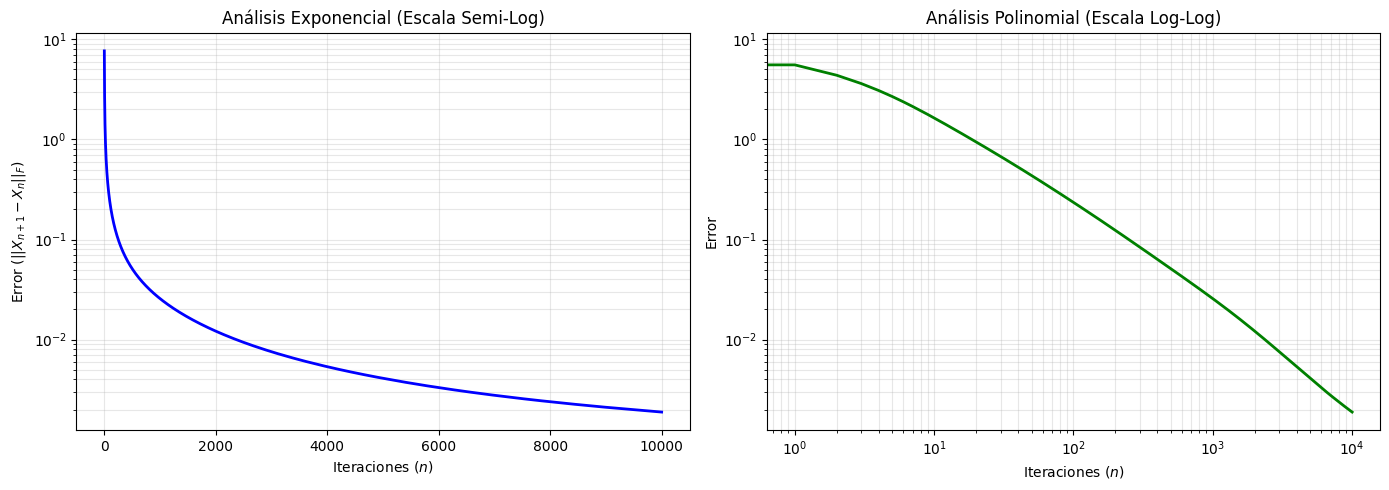

In [ ]:
# ==========================================
# 6. ANÁLISIS DE TASA DE CONVERGENCIA
# ==========================================
# Objetivo: Determinar si el error decae exponencialmente O(e^-n) o polinomialmente O(1/n^c).

plt.figure(figsize=(14, 5))

# --- GRÁFICO 1: Escala Semi-Logarítmica ---
# Si la gráfica es una línea recta, la convergencia es EXPONENCIAL.
# log(Error) ~ -n
plt.subplot(1, 2, 1)
plt.plot(error_history, linewidth=2, color='blue')
plt.yscale('log') # Eje Y logarítmico
plt.title("Análisis Exponencial (Escala Semi-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error ($||X_{n+1} - X_{n}||_F$)")
plt.grid(True, which="both", ls="-", alpha=0.3)

# --- GRÁFICO 2: Escala Log-Log ---
# Si la gráfica fuera recta aquí, la convergencia sería POLINOMIAL.
# log(Error) ~ -log(n)
plt.subplot(1, 2, 2)
plt.loglog(error_history, linewidth=2, color='green') # Ambos ejes logarítmicos
plt.title("Análisis Polinomial (Escala Log-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error")
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

Nuevamente los resultados de convergencia bajo distintos valores de $\alpha$ no lograron converger totalmente tras las prineras 10.000 iteraciones y se sigue observando un decaimiento Polinomial que indica que el error sigue una tasa de caída $\mathcal{O}(1/n^c)$, lo cual es extremadamente lento en resoluciones altas.

Procedemos a utilizar el redimensionamiento (downsampling) como estrategia de optimización para ver si mejora la velocidad de convergencia:

---


### **¿Qué pasa si usamos imagenes como menos pixeles? ¿Alcanzamos convergencia?**

##### Importamos y redimensionamos:

Redimensionando de (814, 1120) a (290, 400)...
Imagen cargada. Dimensiones: (290, 400)


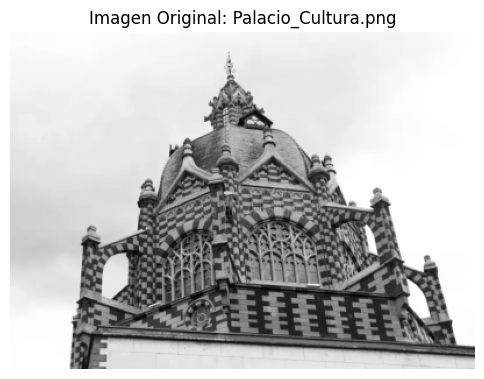

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. Configuración de Rutas para trabajo colaborativo en Git Hub / local---
current_folder = Path.cwd() 
data_path = current_folder / "data"
filename = 'Palacio_Cultura.png'

# Construimos la ruta completa
image_full_path = data_path / filename

# --- 2. Carga y Preprocesamiento ---
X_original = cv2.imread(str(image_full_path), cv2.IMREAD_GRAYSCALE) #garantizamos que se importe en escala de grises

# ==========================================
# REDIMENSIONADO 
# ==========================================
# Definimos un ancho objetivo razonable (ej. 400 px)
target_width = 400 

# Calculamos la altura proporcional para no deformar la foto
aspect_ratio = X_original.shape[0] / X_original.shape[1]
target_height = int(target_width * aspect_ratio)

# Redimensionamos usando OpenCV
print(f"Redimensionando de {X_original.shape} a ({target_height}, {target_width})...")
X_original = cv2.resize(X_original, (target_width, target_height), interpolation=cv2.INTER_AREA)

# AHORA SÍ: Normalizamos a [0, 1]
# (Asegúrate de que esta línea esté DESPUÉS del resize)
if X_original.max() > 1.0:
    X_original = X_original.astype(np.float32) / 255.0



# Como es recomendado, realizamos normalización entre 0 y 1 (Fundamental para la convergencia del algoritmo)
X_original = X_original.astype(np.float32) / 255.0 # -> Normalizamos el rango de intensidad de [0, 255] a [0.0, 1.0].
print(f"Imagen cargada. Dimensiones: {X_original.shape}")

# --- 3. Visualización ---
plt.figure(figsize=(6, 6))
plt.imshow(X_original, cmap='gray')
plt.title(f"Imagen Original: {filename}")
plt.axis('off')
plt.show()

Iniciando proceso iterativo (Alpha=0.5, Tol=1e-05)...
-> Convergencia alcanzada en la iteración 8722 (Error: 1.00e-05)


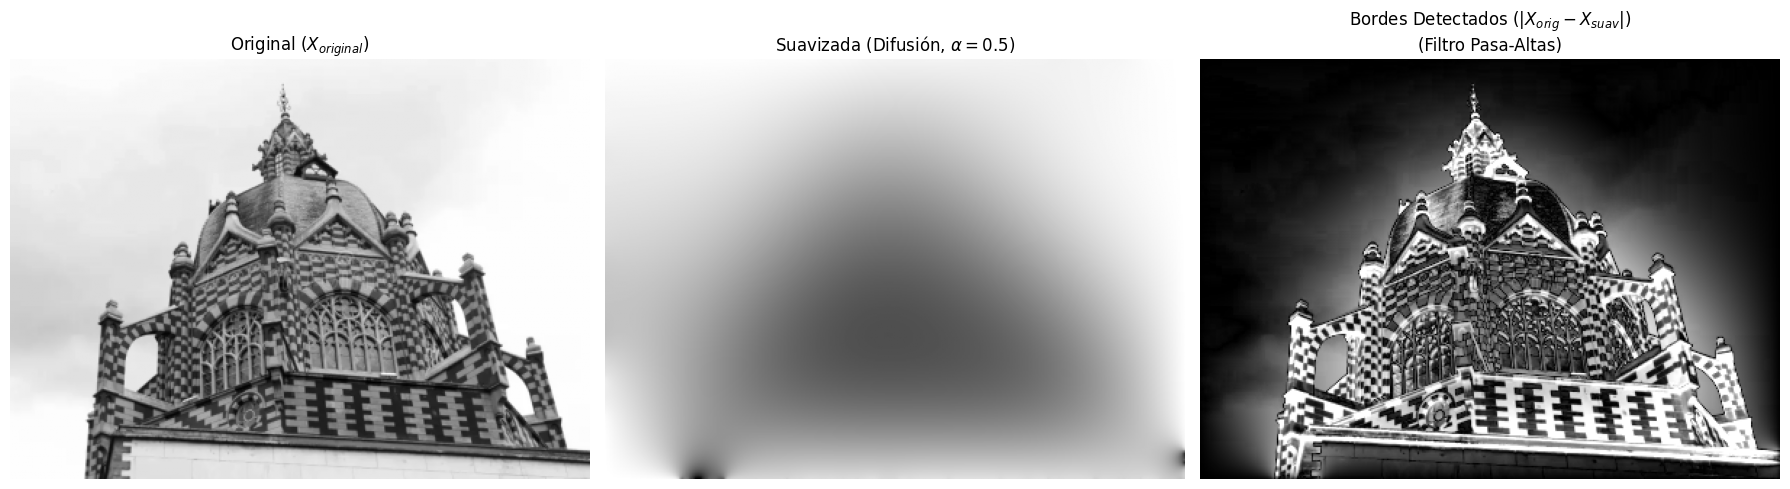

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
ALPHA_VAL = 0.5
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

##### **Experimenta con distintos valores de $α$ y con diferentes imágenes.**

**Bajemos el Alpha a 0.1**:

Iniciando proceso iterativo (Alpha=0.1, Tol=1e-05)...
-> Se alcanzó el límite de iteraciones (10000) sin convergencia total.


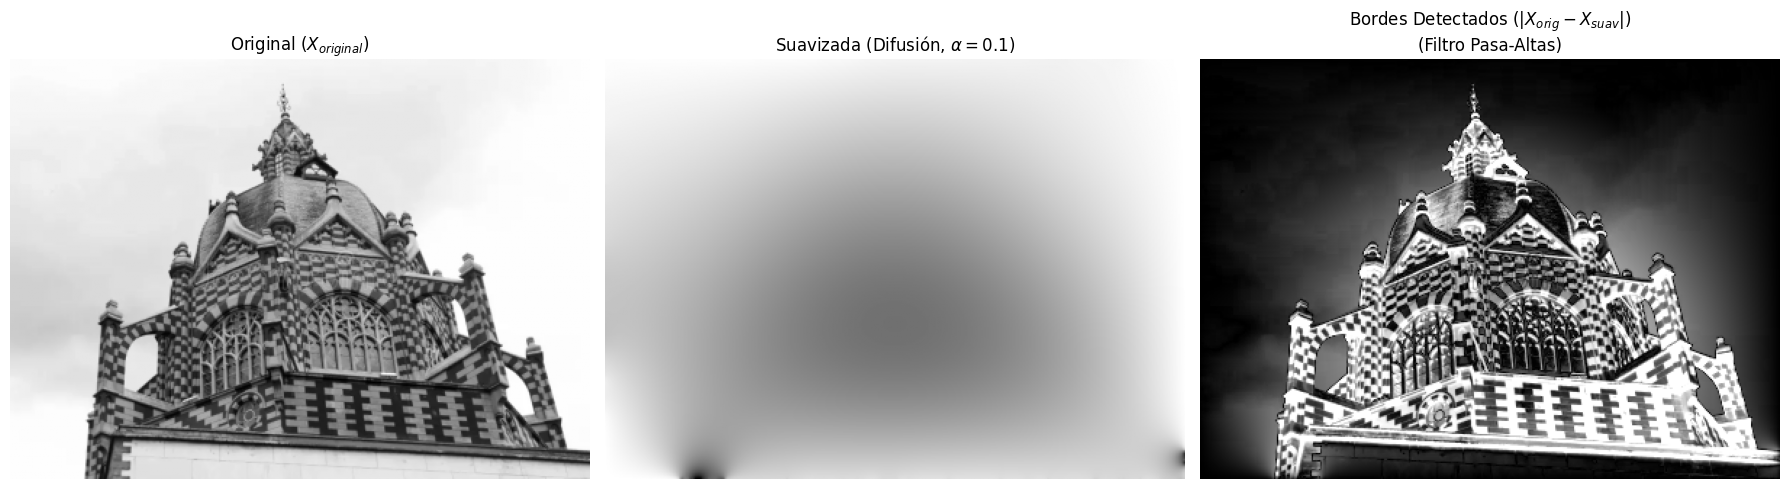

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
# alpha = 0.1: Baja inercia para favorecer una difusión rápida y resaltar bordes.
ALPHA_VAL = 0.1
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

**subimos el Alpha a 0.9**:

Iniciando proceso iterativo (Alpha=0.9, Tol=1e-05)...
-> Convergencia alcanzada en la iteración 4297 (Error: 1.00e-05)


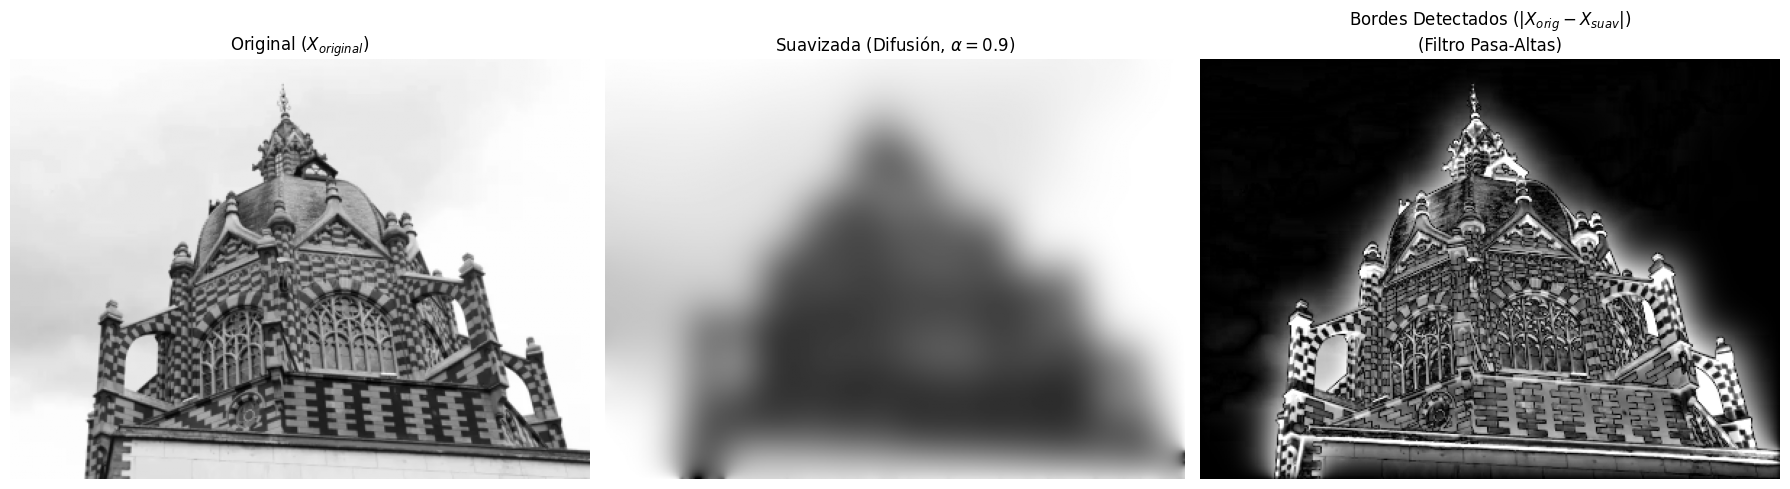

In [ ]:
# ==========================================
# EJECUCIÓN Y DETECCIÓN DE BORDES
# ==========================================

# Parámetros experimentales
# alpha = 0.9: Alta inercia para favorecer una difusión rápida y resaltar bordes.
ALPHA_VAL = 0.9
TOL_VAL = 1e-5

# Ejecutar suavizado
X_smoothed, error_history = smoothing_process(X_original, alpha=ALPHA_VAL, tol=TOL_VAL)

# ---------------------------------------------------------
# FILTRO PASA-ALTAS (Extracción de Bordes)
# ---------------------------------------------------------
# La imagen suavizada (X_smoothed) contiene las bajas frecuencias.
# La imagen original (X_original) contiene bajas + altas frecuencias.
# La diferencia absoluta aísla las altas frecuencias (los bordes).
X_edges = np.abs(X_original - X_smoothed)

# ==========================================
# VISUALIZACIÓN DE RESULTADOS
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen Original
ax[0].imshow(X_original, cmap='gray')
ax[0].set_title("Original ($X_{original}$)")
ax[0].axis('off')

# Imagen Suavizada (Resultado de la difusión)
ax[1].imshow(X_smoothed, cmap='gray')
ax[1].set_title(f"Suavizada (Difusión, $\\alpha={ALPHA_VAL}$)")
ax[1].axis('off')

# Bordes Detectados (El objetivo del ejercicio)
# Usamos vmin/vmax para aumentar el contraste visual de los bordes tenues
ax[2].imshow(X_edges, cmap='gray', vmin=0, vmax=np.max(X_edges)*0.6)
ax[2].set_title("Bordes Detectados ($|X_{orig} - X_{suav}|$)\n(Filtro Pasa-Altas)")
ax[2].axis('off')

plt.tight_layout()
plt.show()

##### **Análisis de convergencia (3):**

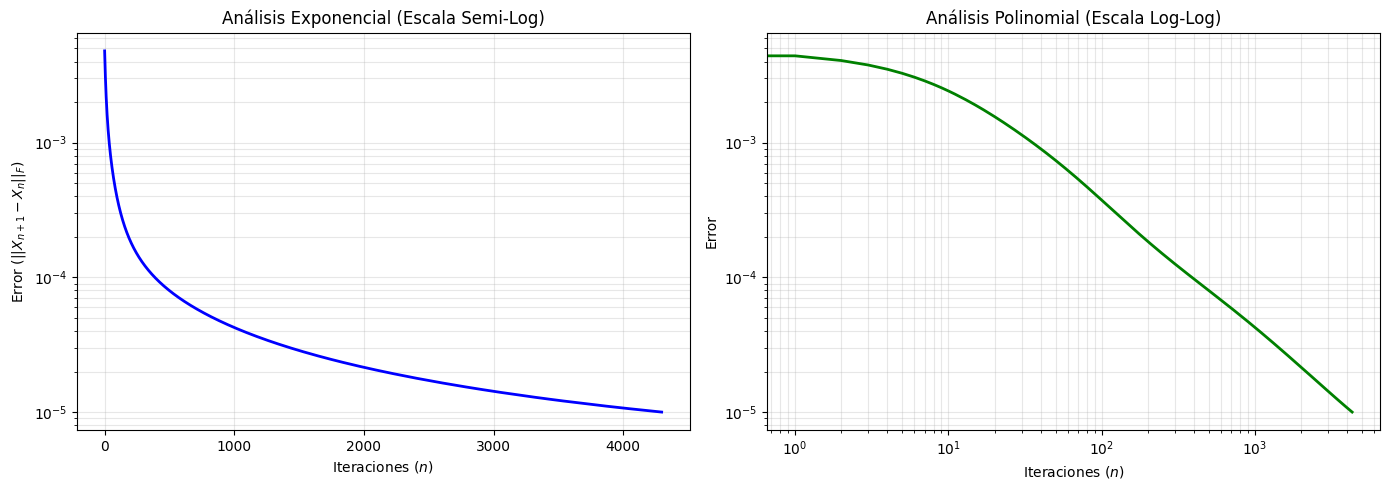

In [ ]:
# ==========================================
# 6. ANÁLISIS DE TASA DE CONVERGENCIA
# ==========================================
# Objetivo: Determinar si el error decae exponencialmente O(e^-n) o polinomialmente O(1/n^c).

plt.figure(figsize=(14, 5))

# --- GRÁFICO 1: Escala Semi-Logarítmica ---
# Si la gráfica es una línea recta, la convergencia es EXPONENCIAL.
# log(Error) ~ -n
plt.subplot(1, 2, 1)
plt.plot(error_history, linewidth=2, color='blue')
plt.yscale('log') # Eje Y logarítmico
plt.title("Análisis Exponencial (Escala Semi-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error ($||X_{n+1} - X_{n}||_F$)")
plt.grid(True, which="both", ls="-", alpha=0.3)

# --- GRÁFICO 2: Escala Log-Log ---
# Si la gráfica fuera recta aquí, la convergencia sería POLINOMIAL.
# log(Error) ~ -log(n)
plt.subplot(1, 2, 2)
plt.loglog(error_history, linewidth=2, color='green') # Ambos ejes logarítmicos
plt.title("Análisis Polinomial (Escala Log-Log)")
plt.xlabel("Iteraciones ($n$)")
plt.ylabel("Error")
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

#### **Análisis de Resultados y Conclusiones Finales**

Tras ajustar la resolución de la imagen (redimensionamiento) y ejecutar el algoritmo bajo diferentes configuraciones de inercia ($\alpha$), se obtuvieron los siguientes resultados empíricos:

| Configuración | Iteraciones | Estado | Interpretación Rápida |
| :--- | :--- | :--- | :--- |
| **$\alpha = 0.9$** (Alta Inercia) | 4,297 | Convergencia | Sistema "Rígido" (Cambios lentos -> poco afectado por los vecinos) |
| **$\alpha = 0.5$** (Balanceado) | 8,722 | Convergencia | Difusión estándar |
| **$\alpha = 0.1$** (Baja Inercia) | > 10,000 | No Convergió | Sistema "Fluido" (Cambios agresivos -> muy sensible a los vecinos) |  


 ***El Impacto de la Resolución***  

La reducción del número de píxeles fue el factor determinante para la viabilidad del experimento.
* **Complejidad Computacional:** El costo por iteración es lineal respecto al número de píxeles ($\mathcal{O}(N)$). Al reducir la imagen de ~900k píxeles a una resolución menor, el tiempo de procesamiento por ciclo se redujo drásticamente.
* **Velocidad de Propagación:** En procesos de difusión, la información viaja de vecino a vecino. En una imagen de $1120$ px de ancho, la información de un borde tarda miles de iteraciones en influir en el centro. Al reducir el tamaño, acortamos la "distancia física" que debe recorrer la información para estabilizar el sistema globalmente.

***Análisis de Sensibilidad al Parámetro Alpha ($\alpha$)***  
Se observa un fenómeno interesante que requiere una interpretación cuidadosa: **¿Por qué el sistema "más rígido a los vecinos" ($\alpha=0.9$) convergió primero?**

La condición de parada es $||\mathbf{X}^{(n+1)} - \mathbf{X}^{(n)}||_F < \text{tol}$.

1.  **Caso $\alpha = 0.9$ (Alta Inercia):**
    * La fórmula $X_{new} = 0.9 X_{old} + 0.1 \text{Vecinos}$ implica que el píxel cambia muy poco en cada paso.
    * Al ser los cambios tan pequeños por diseño, la diferencia entre iteraciones cae por debajo de la tolerancia rápidamente.
    * **Conclusión:** Convergió rápido numéricamente, pero visualmente la imagen se difundió menos que con  $\alpha = 0.1$ (quedó más parecida a la original).

2.  **Caso $\alpha = 0.1$ (Baja Inercia / Alta Difusión):**
    * La fórmula $X_{new} = 0.1 X_{old} + 0.9 \text{Vecinos}$ fuerza al píxel a cambiar agresivamente hacia el promedio de sus vecinos.
    * En cada paso, hay grandes saltos de valor ("turbulencia numérica").
    * **Conclusión:** El error se mantiene alto durante más tiempo porque el sistema está evolucionando muy rápido. Aunque no alcanzó la tolerancia matemática en 10,000 pasos, este es el escenario que genera el suavizado más fuerte y efectivo para eliminar ruido.

***5.3. Conclusión sobre la Convergencia Asintótica***

Las gráficas Log-Log confirman que el error decae siguiendo una ley de potencia (comportamiento lineal en la gráfica), lo que clasifica la convergencia como **Polinomial** $\mathcal{O}(1/n^c)$.

Esto confirma que los métodos iterativos de difusión (tipo Jacobi) son robustos pero lentos para alcanzar el cero absoluto, siendo mucho más eficientes cuando se combinan con técnicas de **Multirresolución** (como hicimos al redimensionar la imagen): resolver lo "grosso" en baja resolución y los detalles en alta.

___